In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv("spam.csv")
df.describe()
df.columns

Index(['Label', 'EmailText'], dtype='object')

In [58]:
y = df['Label']
X = df['EmailText']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
#X_train, X_test, y_train, y_test = X[0:4457], X[4457:], y[0:4457], y[4457:]

In [59]:
print(len(X_train), len(X_test))

4457 1115


In [60]:
cv = CountVectorizer()
features = cv.fit_transform(X_train)

In [61]:
tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}

In [62]:
model = GridSearchCV(svm.SVC(), tuned_parameters)
model.fit(features, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [71]:
test_features = cv.transform(X_test)
y_pred = model.predict(test_features)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


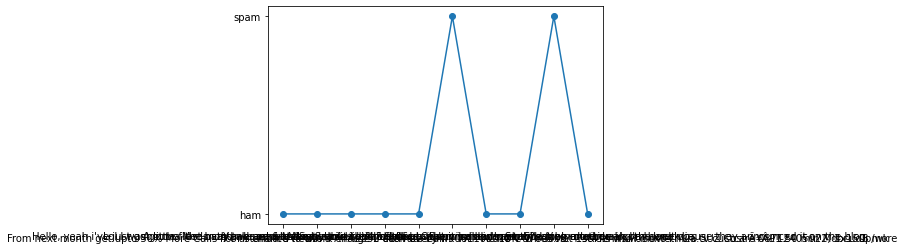

In [77]:
plt.plot(X_test[0:10], y_test[0:10])
plt.scatter(X_test[0:10], y_pred[0:10])
plt.show()

In [63]:
model.score(test_features, y_test)

0.979372197309417